### Load packages and files

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
# change working directory accordingly
wd = 'final_data/' 
sample_ratio = 0.05
# read in CSV as DataFrames
train_df = pd.read_csv(wd + "formatted_train_data_sampleratio_CenDis{}.csv".format(sample_ratio))
train_labels_df = pd.read_csv(wd + "formatted_train_labels_sampleratio_CenDis{}.csv".format(sample_ratio))
test_df = pd.read_csv(wd + "formatted_test_data_sampleratio_CenDis{}.csv".format(sample_ratio))
test_labels_df = pd.read_csv(wd + "formatted_test_labels_sampleratio_CenDis{}.csv".format(sample_ratio))

# to numpy arrays
labels = ["TotalTimeStopped_p20", "TotalTimeStopped_p50", "TotalTimeStopped_p80"]
X_train = train_df.to_numpy()
y_train = train_labels_df[labels].to_numpy()
X_test = test_df.to_numpy()
y_test = test_labels_df[labels].to_numpy()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
train_df.columns

(30538, 35)
(7623, 35)
(30538, 3)
(7623, 3)


Index(['CenterDistance', 'CityId0', 'CityId1', 'CityId2', 'CityId3',
       'Direction', 'EntryHeading0', 'EntryHeading1', 'EntryHeading2',
       'EntryHeading3', 'EntryHeading4', 'EntryHeading5', 'EntryHeading6',
       'EntryHeading7', 'EntryType', 'ExitHeading0', 'ExitHeading1',
       'ExitHeading2', 'ExitHeading3', 'ExitHeading4', 'ExitHeading5',
       'ExitHeading6', 'ExitHeading7', 'ExitType', 'Hour', 'Latitude',
       'LeftSide', 'LeftTurn', 'Longitude', 'Month', 'PassThru', 'RightSide',
       'RightTurn', 'UTurn', 'Weekend'],
      dtype='object')

In [29]:
train_df.head(10)

,CityId0,CityId1,CityId2,CityId3,Direction,DistanceFromCenter,EntryHeading0,EntryHeading1,EntryHeading2,EntryHeading3,...,Latitude,LeftSide,LeftTurn,Longitude,Month,RightSide,RightTurn,RouteBypass,UTurn,Weekend
0,0.0,0.0,0.0,1.0,0,0.007220,1.0,0.0,0.0,0.0,...,39.95001,0,0,-75.15706,10,0,0,0,1,1
1,0.0,0.0,1.0,0.0,0,0.024017,0.0,0.0,0.0,1.0,...,33.74432,0,0,-84.40842,6,0,0,0,1,1
2,0.0,0.0,0.0,1.0,6,0.025358,0.0,0.0,0.0,0.0,...,39.97039,0,0,-75.14654,9,1,1,0,0,1
3,0.0,0.0,0.0,1.0,2,0.015531,0.0,0.0,0.0,0.0,...,39.95258,1,1,-75.14848,6,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0,0.015531,0.0,0.0,0.0,0.0,...,39.95258,0,0,-75.14848,6,0,0,0,1,0
5,0.0,0.0,1.0,0.0,0,0.030097,0.0,0.0,0.0,0.0,...,33.77360,0,0,-84.36371,10,0,0,0,1,1
6,0.0,0.0,0.0,1.0,0,0.049773,0.0,0.0,0.0,0.0,...,39.95550,0,0,-75.21365,10,0,0,0,1,0
7,0.0,0.0,1.0,0.0,2,0.052673,0.0,0.0,1.0,0.0,...,33.71820,1,1,-84.42520,8,0,0,0,0,0
8,1.0,0.0,0.0,0.0,0,0.123875,0.0,0.0,1.0,0.0,...,41.89869,0,0,-87.74590,9,0,0,0,1,1
9,0.0,1.0,0.0,0.0,0,0.025257,1.0,0.0,0.0,0.0,...,42.34951,0,0,-71.07950,10,0,0,0,1,1


### Gradient boost

In [17]:
# gradient boosting
best_params = {'estimator__criterion': 'mse',
               'estimator__learning_rate': 0.2,
               'estimator__max_depth': 3,
               'estimator__n_estimators': 100}
multigbm = MultiOutputRegressor(GradientBoostingRegressor())
multigbm.set_params(**best_params)
multigbm.fit(X_train, y_train)
# Predict on new data
y_multigbm = multigbm.predict(X_test)

In [19]:
y_pred0 = y_multigbm[:,0]
y_pred1 = y_multigbm[:,1]
y_pred2 = y_multigbm[:,2]
mse = mean_squared_error(y_test[:,0], y_multigbm[:,0])
mse1 = mean_squared_error(y_test[:,1], y_multigbm[:,1])
mse2 = mean_squared_error(y_test[:,2], y_multigbm[:,2])
# print(mse, mse1, mse2)
rmse = mse**0.5
rmse1 = mse1**0.5
rmse2 = mse2**0.5
print(mse, mse1, mse2)
print(rmse, rmse1, rmse2)

34.72094436610595 114.79509264748782 368.04409877907545
5.892448079203239 10.714247180622996 19.184475462703574


/Applications/anaconda/envs/EECS545-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


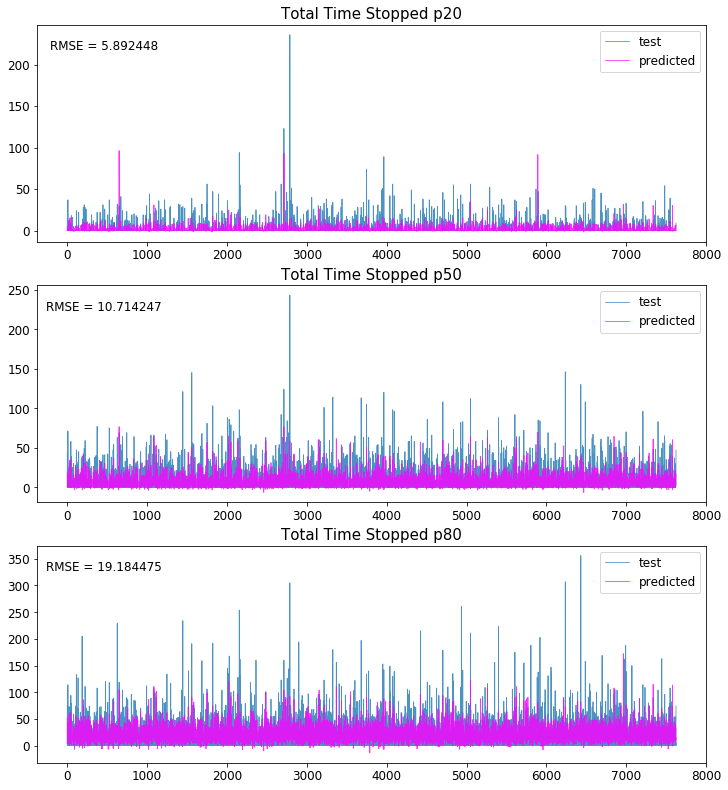

In [20]:
fig, axs = plt.subplots(3,1,figsize=(12,10))
axs[0].plot(y_test[:,0],label='test', linewidth=0.8,alpha=0.8)
axs[0].plot(y_pred0,label='predicted', linewidth=0.8,alpha=0.8,color='magenta')
axs[1].plot(y_test[:,1],label='test', linewidth=0.8,alpha=0.8)
axs[1].plot(y_pred1,label='predicted', linewidth=0.8,alpha=0.8,color='magenta')
axs[2].plot(y_test[:,2],label='test', linewidth=0.8,alpha=0.8)
axs[2].plot(y_pred2,label='predicted', linewidth=0.8,alpha=0.8,color='magenta')
axs[0].legend(loc =1,fontsize=12)
axs[1].legend(loc =1,fontsize=12)
axs[2].legend(loc =1,fontsize=12)
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)
axs[2].tick_params(labelsize=12)
axs[0].set_title('Total Time Stopped p20',fontsize=15)
axs[1].set_title('Total Time Stopped p50',fontsize=15)
axs[2].set_title('Total Time Stopped p80',fontsize=15)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse), ha='center', va='center', transform=axs[0].transAxes,fontsize=12)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse1), ha='center', va='center', transform=axs[1].transAxes,fontsize=12)
plt.text(0.1, 0.9,'RMSE = %f' %np.sqrt(mse2), ha='center', va='center', transform=axs[2].transAxes,fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=1.15)
plt.show()

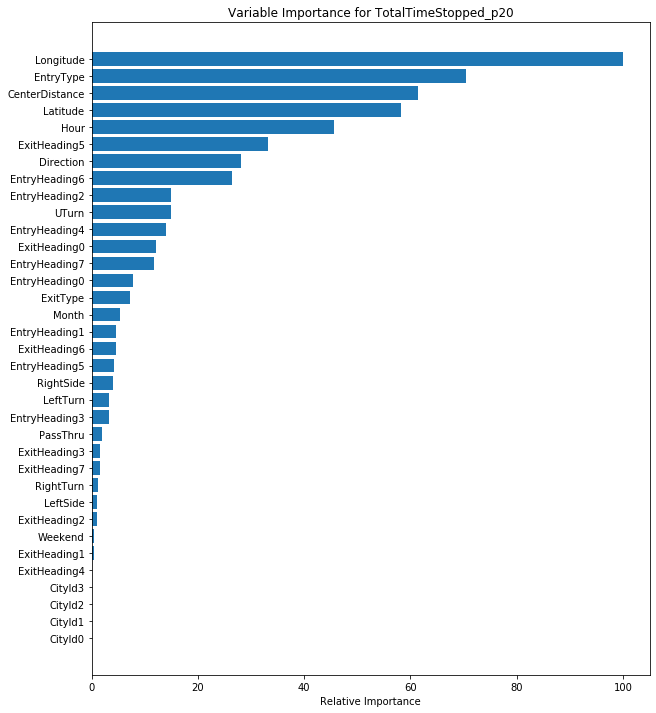

In [21]:
### feature importances

# dict of col indices as keys and names as values
cols_dict = {i: col_name for i, col_name in enumerate(train_df.columns)}
num_regressors = len(multigbm.estimators_)
regressors = []
feat_importances = [] # for each of the labels
for i in range(num_regressors):
    regressors.append(multigbm.estimators_[i])
    feat_importances.append(regressors[i].feature_importances_)
    
# Plot feature importance for TotalTimeStopped_p20
feature_importance = feat_importances[0]
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

# plotting
fig, ax = plt.subplots(figsize=(10,12))
ax.barh(y=pos, width=feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
# get column names
ax.set_yticklabels(np.array( [cols_dict[i] for i in sorted_idx] ))
ax.set_xlabel("Relative Importance")
ax.set_title("Variable Importance for TotalTimeStopped_p20")
plt.show()